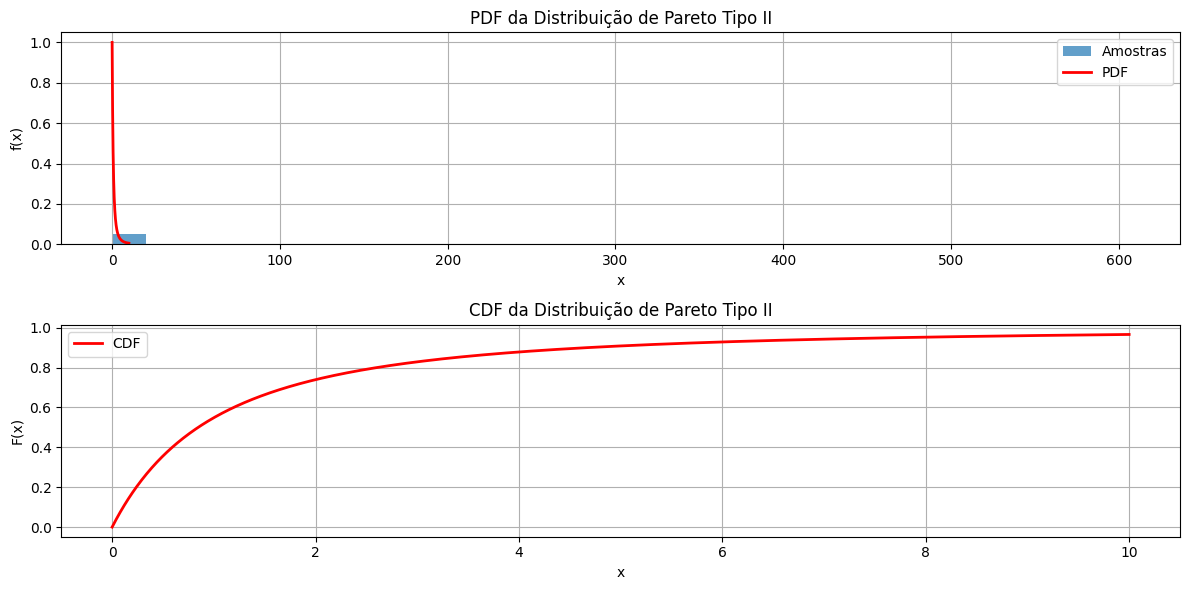

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def service_time_pareto(xm, alpha):
    u = np.random.uniform(0, 1)
    return xm * ((1 - u) ** (-1 / alpha) - 1)

# Parâmetros
xm = 1.8
alpha_pareto = 1.8
n_samples = 1000

# Gerar amostras
samples = [service_time_pareto(xm, alpha_pareto) for _ in range(n_samples)]

# Plotar PDF e CDF
x = np.linspace(0, 10, 1000)
pdf_pareto = (alpha_pareto * xm**alpha_pareto) / (x + xm)**(alpha_pareto + 1)
cdf_pareto = 1 - (xm / (x + xm))**alpha_pareto

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(samples, bins=30, density=True, alpha=0.7, label='Amostras')
plt.plot(x, pdf_pareto, 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PDF da Distribuição de Pareto Tipo II')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_pareto, 'r-', lw=2, label='CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF da Distribuição de Pareto Tipo II')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


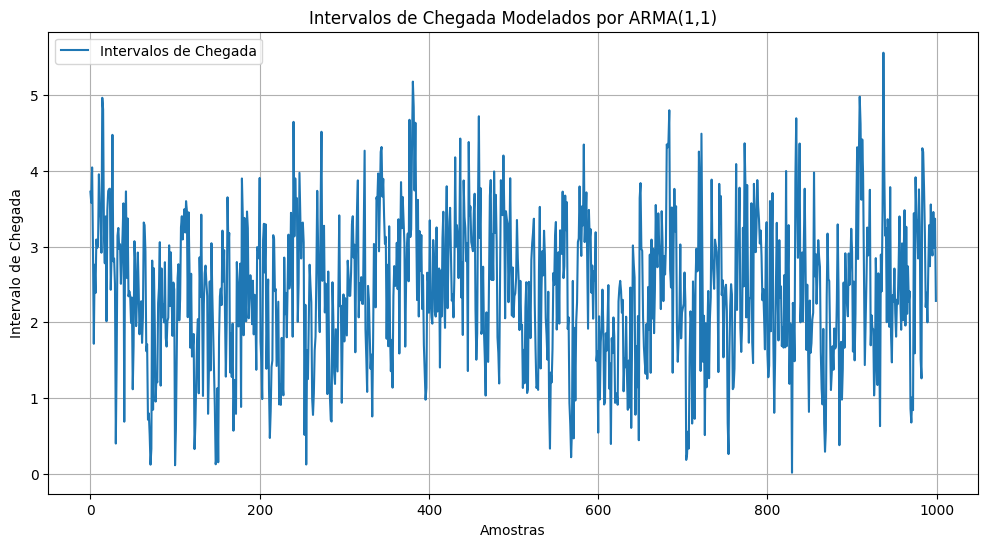

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Parâmetros ARMA(1,1)
phi_1 = 0.7
theta_1 = -0.3
sigma = np.sqrt(3)
mu = 5
alpha = 0.5  # Ajuste conforme necessário

# Definindo o modelo ARMA(1,1)
ar = np.array([1, -phi_1])
ma = np.array([1, theta_1])
arma_process = ArmaProcess(ar, ma)

# Gerando a série ARMA(1,1)
n_samples = 1000
arma_series = arma_process.generate_sample(nsample=n_samples, scale=sigma) + mu

# Aplicando o fator alpha
inter_arrival_times = np.abs(alpha * arma_series)

# Plotando os intervalos de chegada
plt.figure(figsize=(12, 6))
plt.plot(inter_arrival_times, label='Intervalos de Chegada')
plt.xlabel('Amostras')
plt.ylabel('Intervalo de Chegada')
plt.title('Intervalos de Chegada Modelados por ARMA(1,1)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: voce pode me explicar passo a passo como é possivel validar os resultados encontrados no codigo acima?

Ok, vamos analisar passo a passo como validar os resultados encontrados no código que você forneceu. O código gera amostras de uma distribuição de Pareto Tipo II e uma série temporal ARMA(1,1), e então plota a PDF e CDF da distribuição de Pareto e os intervalos de chegada modelados pela série ARMA.

**Validação da Distribuição de Pareto:**

1. **Comparar a PDF e CDF teóricas com os dados gerados:** O código gera amostras da distribuição de Pareto e plota um histograma das amostras, superpondo a PDF teórica. A sobreposição deve ser razoavelmente boa se as amostras foram geradas corretamente. A CDF teórica também é plotada e deve refletir a probabilidade acumulada dos dados amostrais.
2. **Verificar a média e variância:** Você pode calcular a média e a variância das amostras geradas e compará-las com as formulas teóricas para a distribuição de Pareto Tipo II.
3. **Testes de Bondade de Ajuste:** Existem testes estatísticos que podem avaliar se os dados amostrais se ajustam bem a uma distribuição específica, por exemplo, o teste de Kolmogorov-Smirnov. Você pode usar bibliotecas como scipy.stats para realizar esses testes.

**Validação da Série ARMA(1,1):**

1. **Analisar a autocorrelação e autocorrelação parcial (ACF e PACF):** Essas funções ajudam a identificar a ordem do processo ARMA. Para a série gerada, você pode calcular a ACF e PACF usando funções como `statsmodels.tsa.stattools.acf` e `statsmodels.tsa.stattools.pacf`. Verifique se o decaimento da ACF e PACF coincide com o que é esperado para um processo ARMA(1,1) com os parâmetros que você definiu.
2. **Estimação de Parâmetros:** É possível estimar os parâmetros do modelo ARMA (phi_1, theta_1, sigma e mu) a partir dos dados gerados usando bibliotecas como `statsmodels.tsa.arima.model`. Compare os parâmetros estimados com os parâmetros originais que você definiu.  Se estiverem próximos, isso indica que o modelo foi bem estimado.
3. **Analisar a função densidade espectral:** A função densidade espectral (FDE) fornece informações sobre a frequência e a magnitude das variações na série temporal. Se você plotar a FDE da série gerada, você pode obter uma ideia de como as diferentes frequências estão representadas na série.
4. **Diagnóstico de Resíduos:** Após ajustar o modelo ARMA, você deve analisar os resíduos (a diferença entre os valores observados e os valores previstos pelo modelo). Resíduos aleatórios e não correlacionados são uma indicação de que o modelo se ajusta bem aos dados. Utilize ferramentas como o teste de Ljung-Box para verificar a autocorrelação dos resíduos.


**Dicas adicionais:**

* Aumente o número de amostras geradas para obter resultados mais precisos.
* Utilize gráficos de diagnóstico como histograma dos resíduos, Q-Q plot e gráficos de autocorrelação para analisar se o modelo ARMA ajustado se ajusta bem aos dados.
* Documente os resultados de seus testes e comparações para uma análise completa.

Ao seguir essas etapas, você pode verificar se as amostras da distribuição de Pareto e a série ARMA(1,1) foram geradas corretamente e se os resultados do código são válidos.


Espero que isso ajude!

**2. Detalhamento da simulação para o tempo de atendimento do Servidor 1 com a distribuição Pareto tipo II, e validação da implementação;**

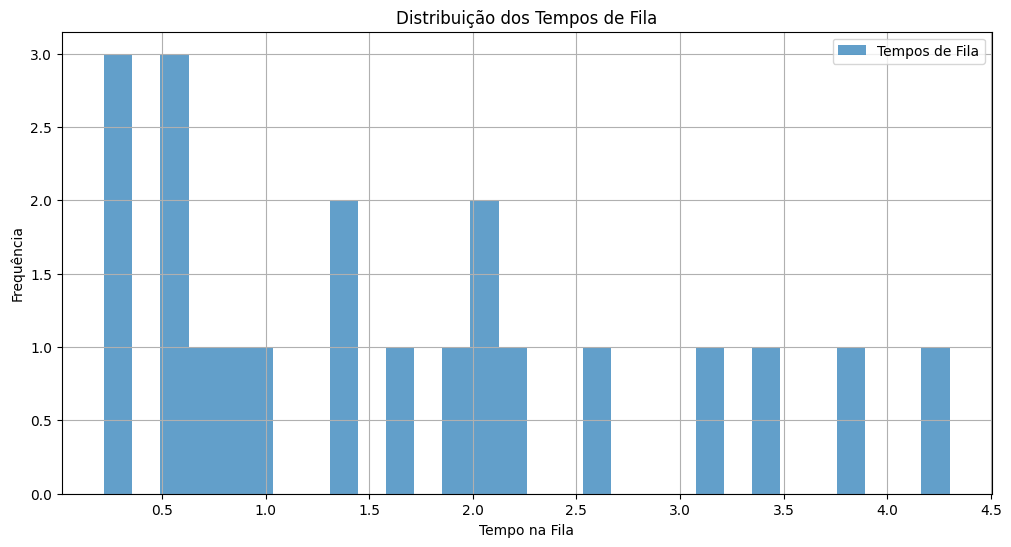

In [35]:
# Função para gerar tempos de serviço
def service_time_exponential():
    return np.random.exponential(1)

def service_time_pareto(xm, alpha):
    u = np.random.uniform(0, 1)
    return xm * ((1 - u) ** (-1 / alpha) - 1)

# Simulação do sistema de filas
def simulate_queue(n_customers, inter_arrival_times, xm, alpha_pareto):
    queue_times = []
    server1_busy = 0
    server2_busy = 0

    for i in range(n_customers):
        arrival_time = inter_arrival_times[i]

        if server1_busy <= 0:
            service_time = service_time_exponential()
            server1_busy = service_time
        elif server2_busy <= 0:
            service_time = service_time_pareto(xm, alpha_pareto)
            server2_busy = service_time
        else:
            queue_times.append(arrival_time)

        server1_busy -= arrival_time
        server2_busy -= arrival_time

    return queue_times

# Configurações
n_customers = 1000
xm = 1.8
alpha_pareto = 1.8

# Simulação
queue_times = simulate_queue(n_customers, inter_arrival_times, xm, alpha_pareto)

# Plotando os tempos de fila
plt.figure(figsize=(12, 6))
plt.hist(queue_times, bins=30, alpha=0.7, label='Tempos de Fila')
plt.xlabel('Tempo na Fila')
plt.ylabel('Frequência')
plt.title('Distribuição dos Tempos de Fila')
plt.legend()
plt.grid(True)
plt.show()


**VALIDAÇÃO DA IMPLEMENTAÇÃO DA DISTRIBUIÇÃO DE PARETO TIPO II.**

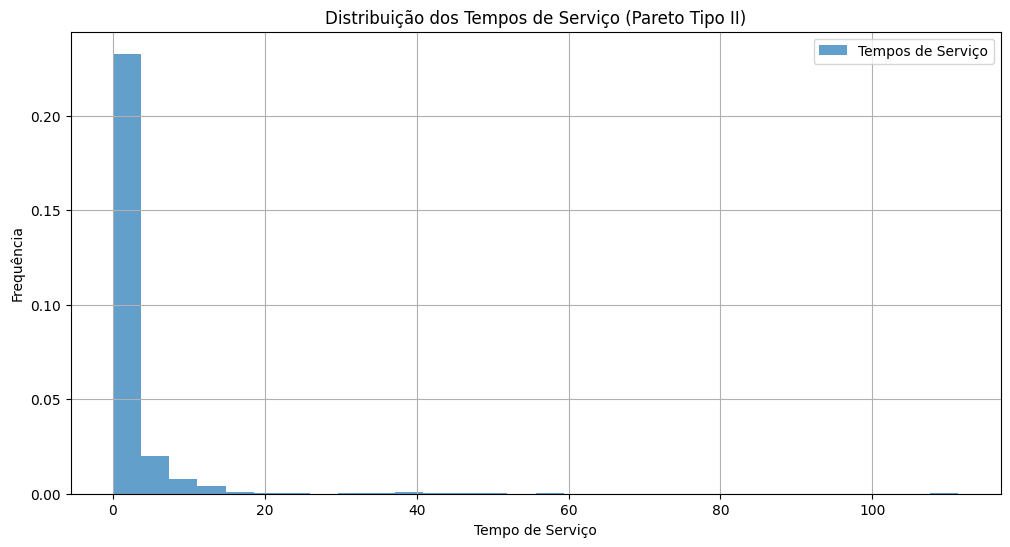

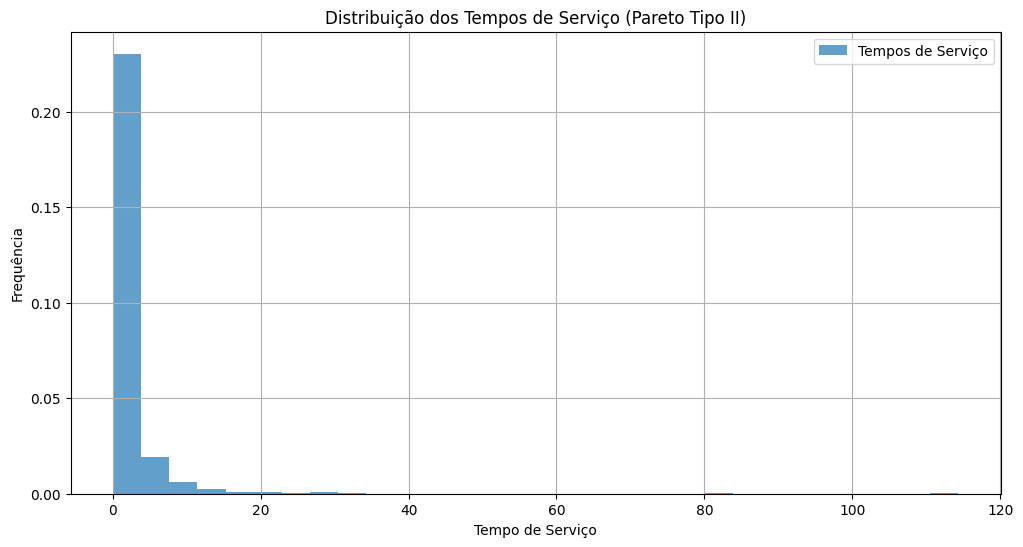

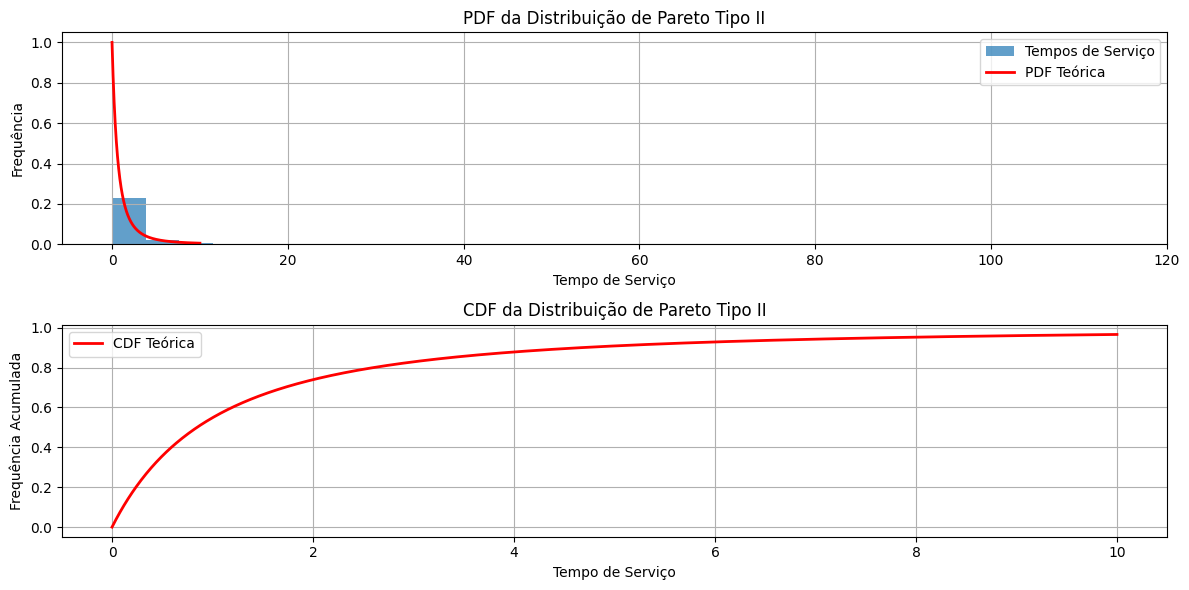

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar tempos de serviço usando a distribuição de Pareto Tipo II
def service_time_pareto(xm, alpha):
    u = np.random.uniform(0, 1)
    return xm * ((1 - u) ** (-1 / alpha) - 1)

# Parâmetros da distribuição de Pareto Tipo II
xm = 1.8  # Parâmetro de escala
alpha_pareto = 1.8  # Parâmetro de forma

# Gerar amostras de tempos de serviço
n_samples = 1000
service_times = [service_time_pareto(xm, alpha_pareto) for _ in range(n_samples)]

# Plotar a distribuição dos tempos de serviço
plt.figure(figsize=(12, 6))
plt.hist(service_times, bins=30, density=True, alpha=0.7, label='Tempos de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Tempos de Serviço (Pareto Tipo II)')
plt.legend()
plt.grid(True)
plt.show()


# Simulação do tempo de atendimento do Servidor 1
def simulate_service_times(n_customers, xm, alpha_pareto):
    service_times = [service_time_pareto(xm, alpha_pareto) for _ in range(n_customers)]
    return service_times

# Configurações
n_customers = 1000

# Simulação
service_times = simulate_service_times(n_customers, xm, alpha_pareto)

# Plotar a distribuição dos tempos de serviço
plt.figure(figsize=(12, 6))
plt.hist(service_times, bins=30, density=True, alpha=0.7, label='Tempos de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Tempos de Serviço (Pareto Tipo II)')
plt.legend()
plt.grid(True)
plt.show()



# Calcular a PDF e a CDF da distribuição de Pareto Tipo II
x = np.linspace(0, 10, 1000)
pdf_pareto = (alpha_pareto * xm**alpha_pareto) / (x + xm)**(alpha_pareto + 1)
cdf_pareto = 1 - (xm / (x + xm))**alpha_pareto

# Plotar a PDF e a CDF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(service_times, bins=30, density=True, alpha=0.7, label='Tempos de Serviço')
plt.plot(x, pdf_pareto, 'r-', lw=2, label='PDF Teórica')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.title('PDF da Distribuição de Pareto Tipo II')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_pareto, 'r-', lw=2, label='CDF Teórica')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência Acumulada')
plt.title('CDF da Distribuição de Pareto Tipo II')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Parte 3 - Implementação da Distribuição Exponencial.**

**Gerando Tempos de Serviços**

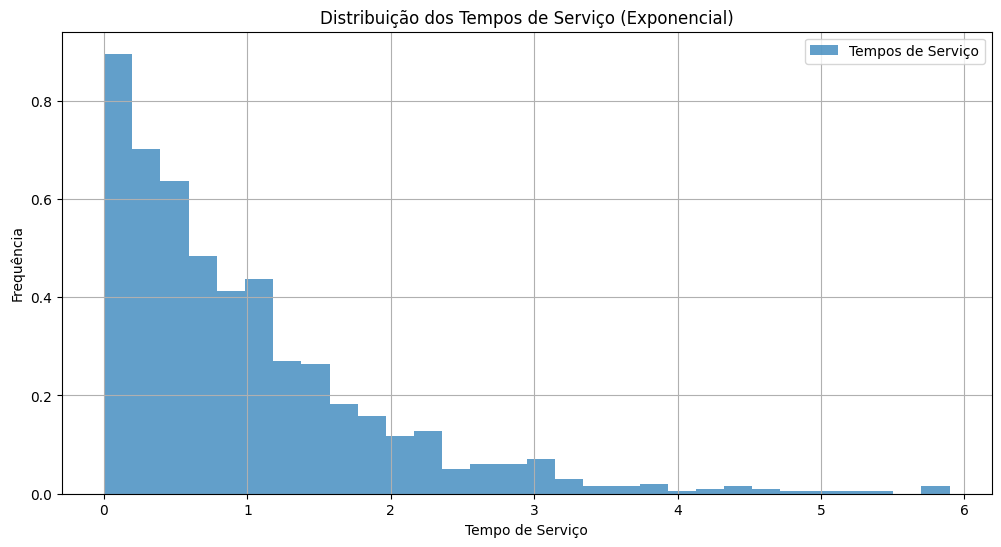

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar tempos de serviço usando a distribuição Exponencial
def service_time_exponential(lam):
    return np.random.exponential(1 / lam)

# Parâmetro da distribuição Exponencial
lam = 1  # Taxa de atendimento (tempo médio de atendimento = 1 segundo)

# Gerar amostras de tempos de serviço
n_samples = 1000
service_times = [service_time_exponential(lam) for _ in range(n_samples)]

# Plotar a distribuição dos tempos de serviço
plt.figure(figsize=(12, 6))
plt.hist(service_times, bins=30, density=True, alpha=0.7, label='Tempos de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Tempos de Serviço (Exponencial)')
plt.legend()
plt.grid(True)
plt.show()


**Simulação do Tempo de Atendimento**


Simulação do tempo de atendimento do Servidor 1 usando a distribuição Exponencial.

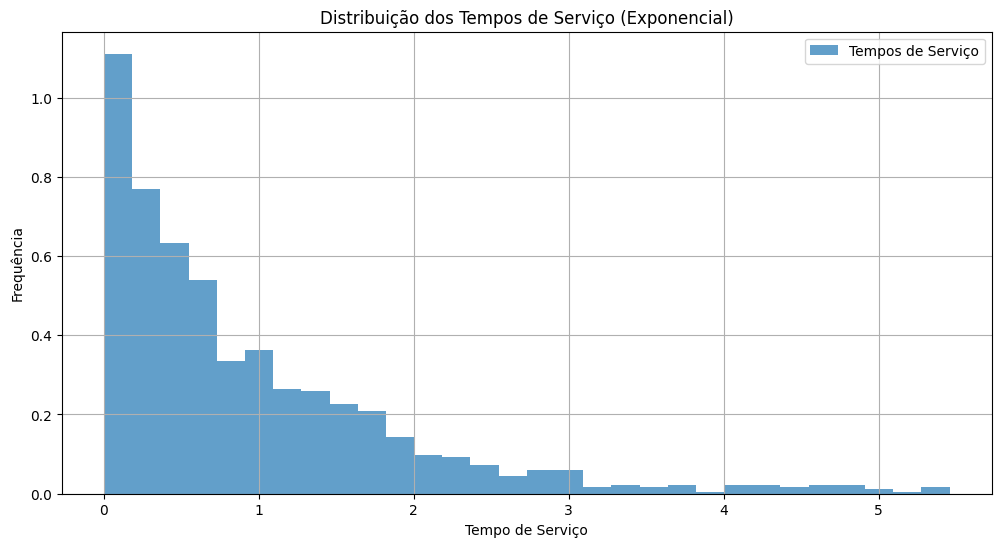

In [10]:
# Simulação do tempo de atendimento do Servidor 1
def simulate_service_times(n_customers, lam):
    service_times = [service_time_exponential(lam) for _ in range(n_customers)]
    return service_times

# Configurações
n_customers = 1000

# Simulação
service_times = simulate_service_times(n_customers, lam)

# Plotar a distribuição dos tempos de serviço
plt.figure(figsize=(12, 6))
plt.hist(service_times, bins=30, density=True, alpha=0.7, label='Tempos de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Tempos de Serviço (Exponencial)')
plt.legend()
plt.grid(True)
plt.show()


**Validação da Implementação**


Para validar a implementação, podemos comparar os resultados da simulação com a distribuição teórica Exponencial. Para isto devemos calcular a função de densidade de probabilidade (PDF) e a função de distribuição acumulada (CDF) e compará-las com os resultados da simulação.

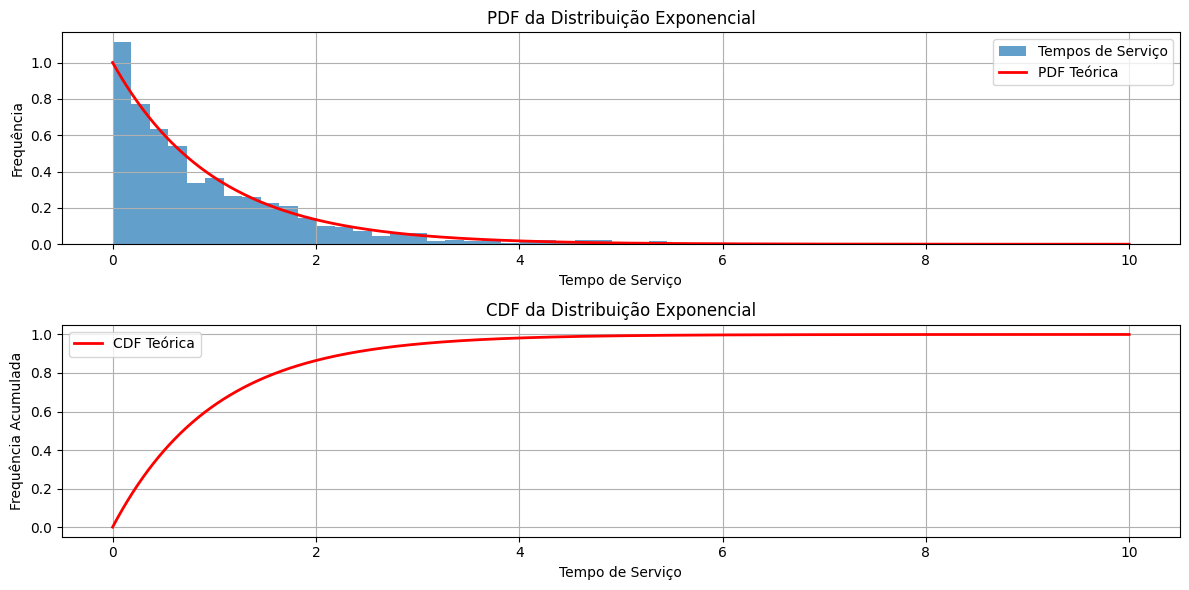

In [11]:
# Calcular a PDF e a CDF da distribuição Exponencial
x = np.linspace(0, 10, 1000)
pdf_exponential = lam * np.exp(-lam * x)
cdf_exponential = 1 - np.exp(-lam * x)

# Plotar a PDF e a CDF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(service_times, bins=30, density=True, alpha=0.7, label='Tempos de Serviço')
plt.plot(x, pdf_exponential, 'r-', lw=2, label='PDF Teórica')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.title('PDF da Distribuição Exponencial')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_exponential, 'r-', lw=2, label='CDF Teórica')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência Acumulada')
plt.title('CDF da Distribuição Exponencial')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**4. Implementação da Simulação com Sistema de filas**

Vamos considerar um sistema com dois servidores, onde o primeiro servidor segue uma distribuição Exponencial e o segundo servidor segue uma distribuição de Pareto Tipo II.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar tempos de serviço usando a distribuição Exponencial
def service_time_exponential(lam):
    return np.random.exponential(1 / lam)

# Função para gerar tempos de serviço usando a distribuição de Pareto Tipo II
def service_time_pareto(xm, alpha):
    u = np.random.uniform(0, 1)
    return xm * ((1 - u) ** (-1 / alpha) - 1)


Função para gerar Intervalos de Chegada usando uma série ARMA(1,1).

In [13]:
from statsmodels.tsa.arima_process import ArmaProcess

# Parâmetros ARMA(1,1)
phi_1 = 0.7
theta_1 = -0.3
sigma = np.sqrt(3)
mu = 5
alpha = 0.5  # Ajuste conforme necessário

# Definindo o modelo ARMA(1,1)
ar = np.array([1, -phi_1])
ma = np.array([1, theta_1])
arma_process = ArmaProcess(ar, ma)

# Função para gerar intervalos de chegada
def generate_inter_arrival_times(n, alpha):
    arma_series = arma_process.generate_sample(nsample=n, scale=sigma) + mu
    return np.abs(alpha * arma_series)


**Simulação do Sistema de Filas com dois servidores**

In [14]:
# Simulação do sistema de filas
def simulate_queue(n_customers, inter_arrival_times, lam, xm, alpha_pareto):
    queue_times = []
    server1_busy = 0
    server2_busy = 0

    for i in range(n_customers):
        arrival_time = inter_arrival_times[i]

        if server1_busy <= 0:
            service_time = service_time_exponential(lam)
            server1_busy = service_time
        elif server2_busy <= 0:
            service_time = service_time_pareto(xm, alpha_pareto)
            server2_busy = service_time
        else:
            queue_times.append(arrival_time)

        server1_busy -= arrival_time
        server2_busy -= arrival_time

    return queue_times


**Execução da SImulação e plotar os gráficos**

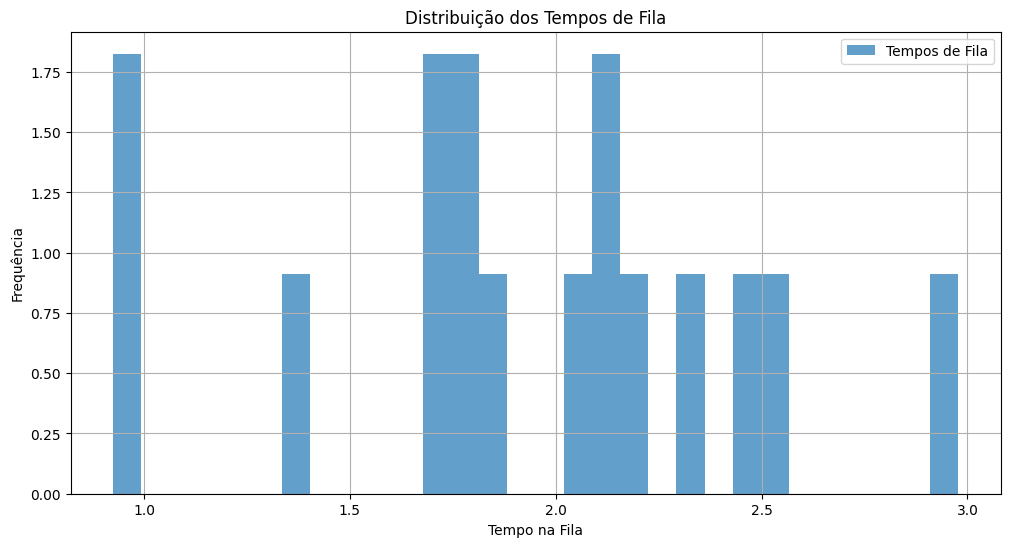

In [15]:
# Configurações
n_customers = 1000
lam = 1  # Taxa de atendimento do Servidor 1 (Exponencial)
xm = 1.8  # Parâmetro de escala do Servidor 2 (Pareto Tipo II)
alpha_pareto = 1.8  # Parâmetro de forma do Servidor 2 (Pareto Tipo II)

# Gerar intervalos de chegada
inter_arrival_times = generate_inter_arrival_times(n_customers, alpha)

# Simulação
queue_times = simulate_queue(n_customers, inter_arrival_times, lam, xm, alpha_pareto)

# Plotar a distribuição dos tempos de fila
plt.figure(figsize=(12, 6))
plt.hist(queue_times, bins=30, density=True, alpha=0.7, label='Tempos de Fila')
plt.xlabel('Tempo na Fila')
plt.ylabel('Frequência')
plt.title('Distribuição dos Tempos de Fila')
plt.legend()
plt.grid(True)
plt.show()


5. Resultados simulados considerando o fator α de 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 e 1.0, incluindo intervalos de confiança;

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.tsa.arima_process import ArmaProcess
import pandas as pd

# Função para gerar tempos de serviço usando a distribuição Exponencial
def service_time_exponential(lam):
    return np.random.exponential(1 / lam)

# Função para gerar tempos de serviço usando a distribuição de Pareto Tipo II
def service_time_pareto(xm, alpha):
    u = np.random.uniform(0, 1)
    return xm * ((1 - u) ** (-1 / alpha) - 1)

# Parâmetros ARMA(1,1)
phi_1 = 0.7
theta_1 = -0.3
sigma = np.sqrt(3)
mu = 5

# Definindo o modelo ARMA(1,1)
ar = np.array([1, -phi_1])
ma = np.array([1, theta_1])
arma_process = ArmaProcess(ar, ma)

# Função para gerar intervalos de chegada
def generate_inter_arrival_times(n, alpha):
    arma_series = arma_process.generate_sample(nsample=n, scale=sigma) + mu
    return np.abs(alpha * arma_series)


**Simulação do Sistema de Filas**

In [17]:
# Simulação do sistema de filas
def simulate_queue(n_customers, inter_arrival_times, lam, xm, alpha_pareto):
    queue_times = []
    server1_busy = 0
    server2_busy = 0

    for i in range(n_customers):
        arrival_time = inter_arrival_times[i]

        if server1_busy <= 0:
            service_time = service_time_exponential(lam)
            server1_busy = service_time
        elif server2_busy <= 0:
            service_time = service_time_pareto(xm, alpha_pareto)
            server2_busy = service_time
        else:
            queue_times.append(arrival_time)

        server1_busy -= arrival_time
        server2_busy -= arrival_time

    return queue_times


**Intervalo de Confiança**

In [18]:
# Função para calcular intervalo de confiança
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n - 1)
    return mean, mean - h, mean + h


**Configurações e Execução da Simulação**

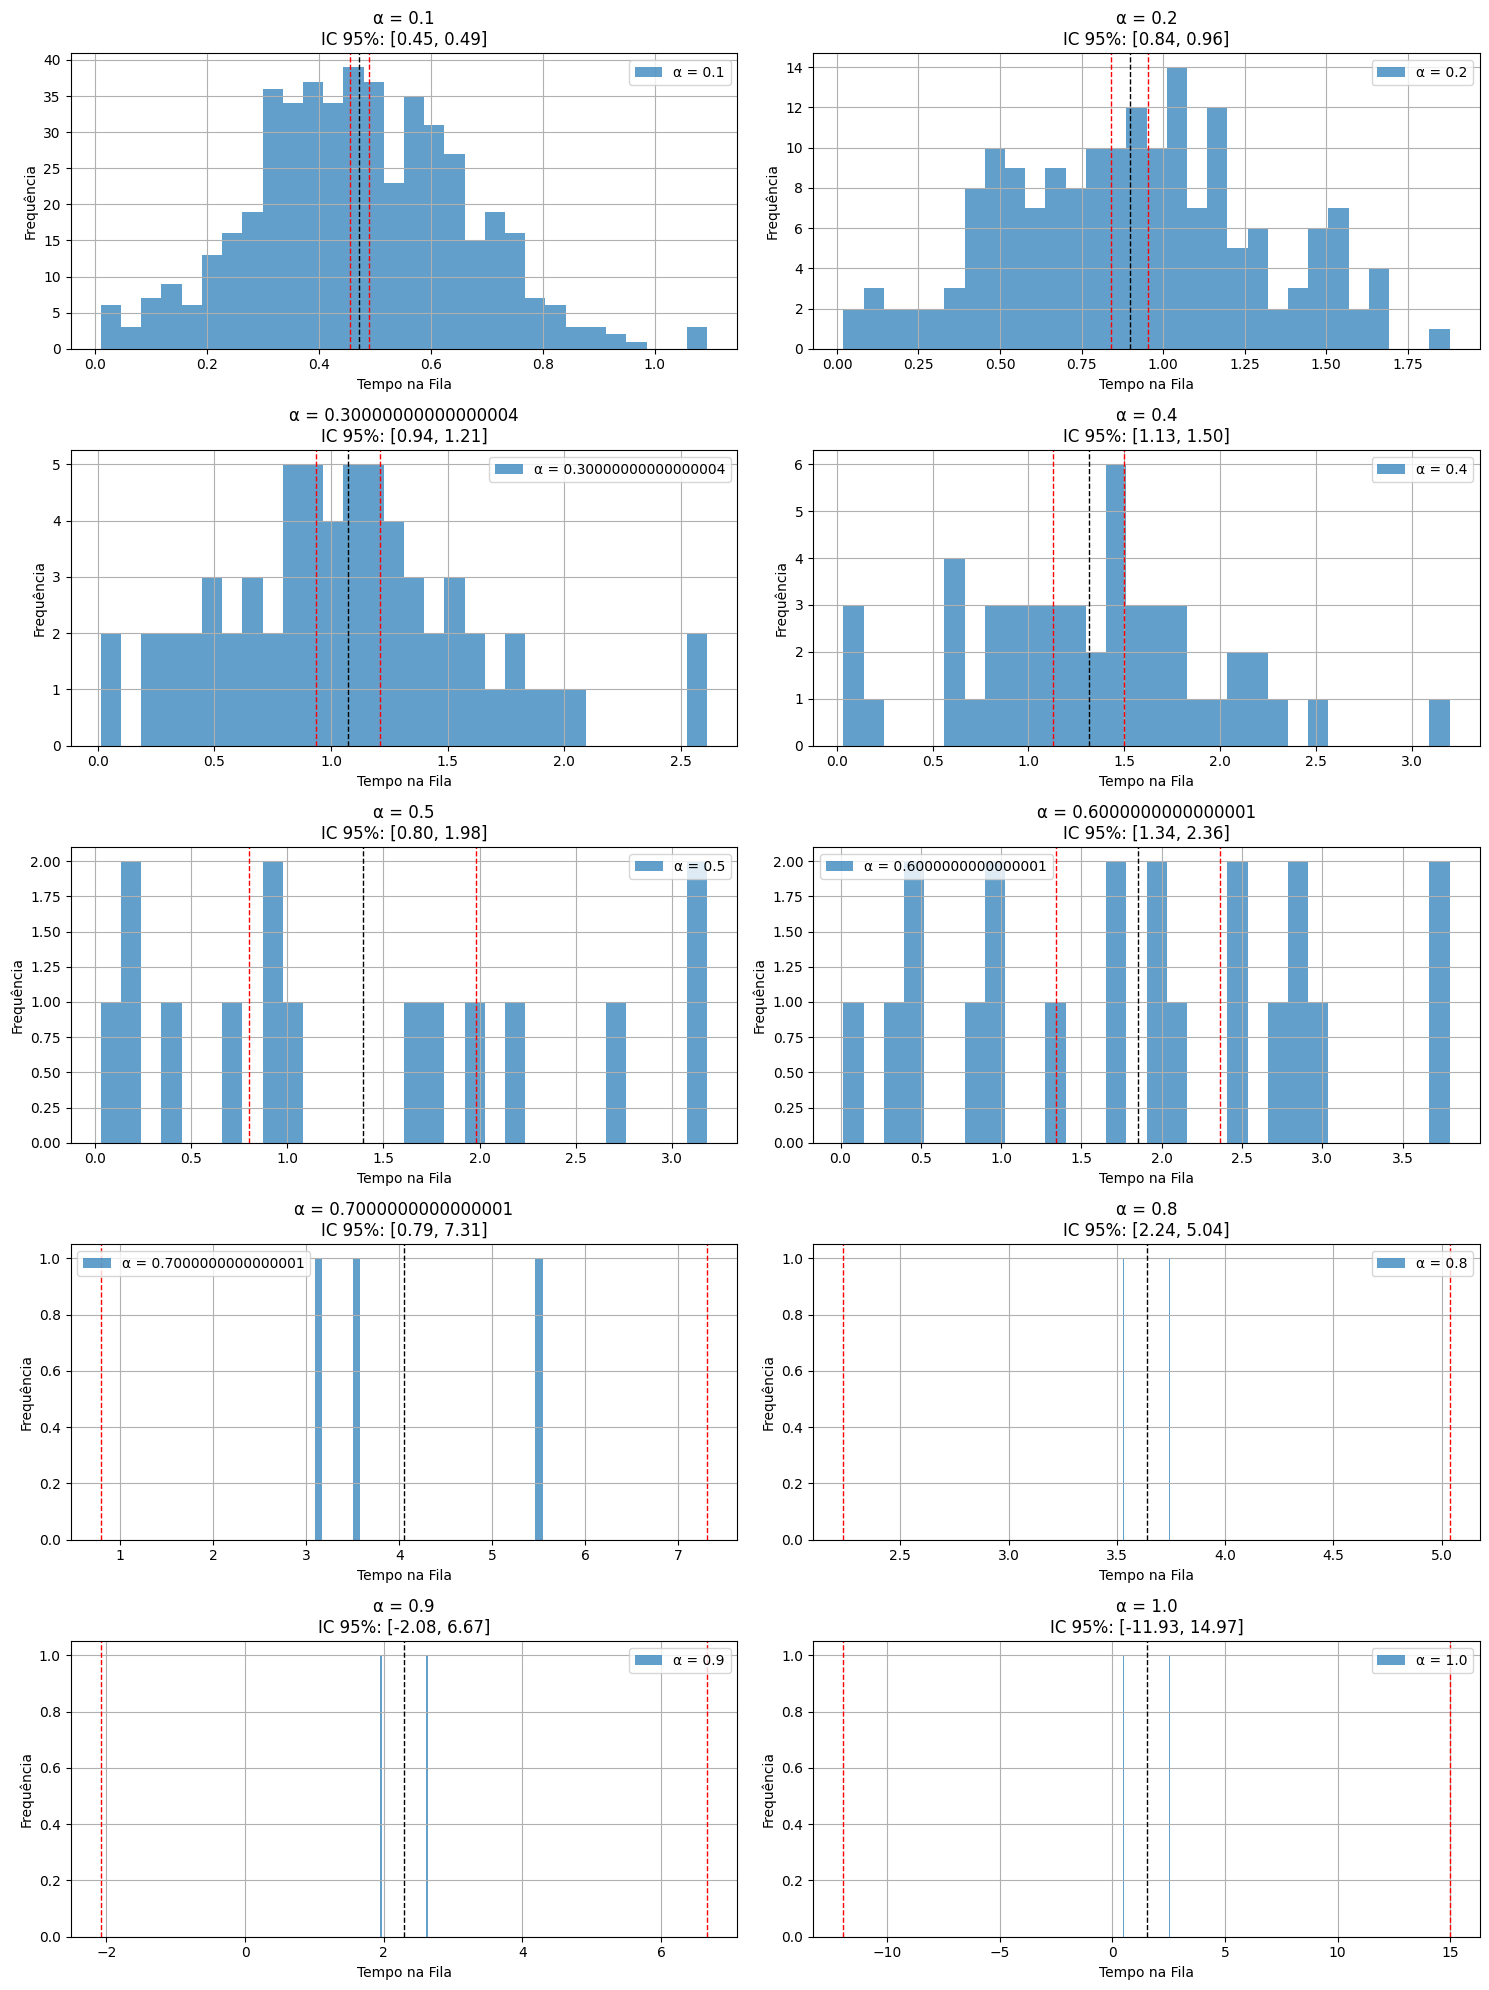

In [19]:
# Configurações
n_customers = 1000
lam = 1  # Taxa de atendimento do Servidor 1 (Exponencial)
xm = 1.8  # Parâmetro de escala do Servidor 2 (Pareto Tipo II)
alpha_pareto = 1.8  # Parâmetro de forma do Servidor 2 (Pareto Tipo II)
alphas = [0.1 * i for i in range(1, 11)]

# Simulações e gráficos
plt.figure(figsize=(15, 20))

for idx, alpha in enumerate(alphas):
    inter_arrival_times = generate_inter_arrival_times(n_customers, alpha)
    queue_times = simulate_queue(n_customers, inter_arrival_times, lam, xm, alpha_pareto)
    mean, lower, upper = confidence_interval(queue_times)

    plt.subplot(5, 2, idx + 1)
    plt.hist(queue_times, bins=30, alpha=0.7, label=f'α = {alpha}')
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(lower, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(upper, color='r', linestyle='dashed', linewidth=1)
    plt.xlabel('Tempo na Fila')
    plt.ylabel('Frequência')
    plt.title(f'α = {alpha}\nIC 95%: [{lower:.2f}, {upper:.2f}]')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


**6. Comparação deste sistema com o caso de uma rede M/M/2.**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Função para gerar tempos de serviço usando a distribuição Exponencial
def service_time_exponential(lam):
    return np.random.exponential(1 / lam)

# Função para simular uma rede M/M/C
def simulate_mm_c_queue(n_customers, lam, mu, C):
    inter_arrival_times = np.random.exponential(1 / lam, n_customers)
    service_times = np.random.exponential(1 / mu, n_customers)
    queue_times = []
    servers_busy = np.zeros(C)

    for i in range(n_customers):
        arrival_time = inter_arrival_times[i]
        min_busy_server = np.argmin(servers_busy)

        if servers_busy[min_busy_server] <= 0:
            servers_busy[min_busy_server] = service_times[i]
        else:
            queue_times.append(arrival_time)

        servers_busy -= arrival_time

    return queue_times

# Função para calcular intervalo de confiança
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n - 1)
    return mean, mean - h, mean + h


**Configurações e Execução da Simulação**

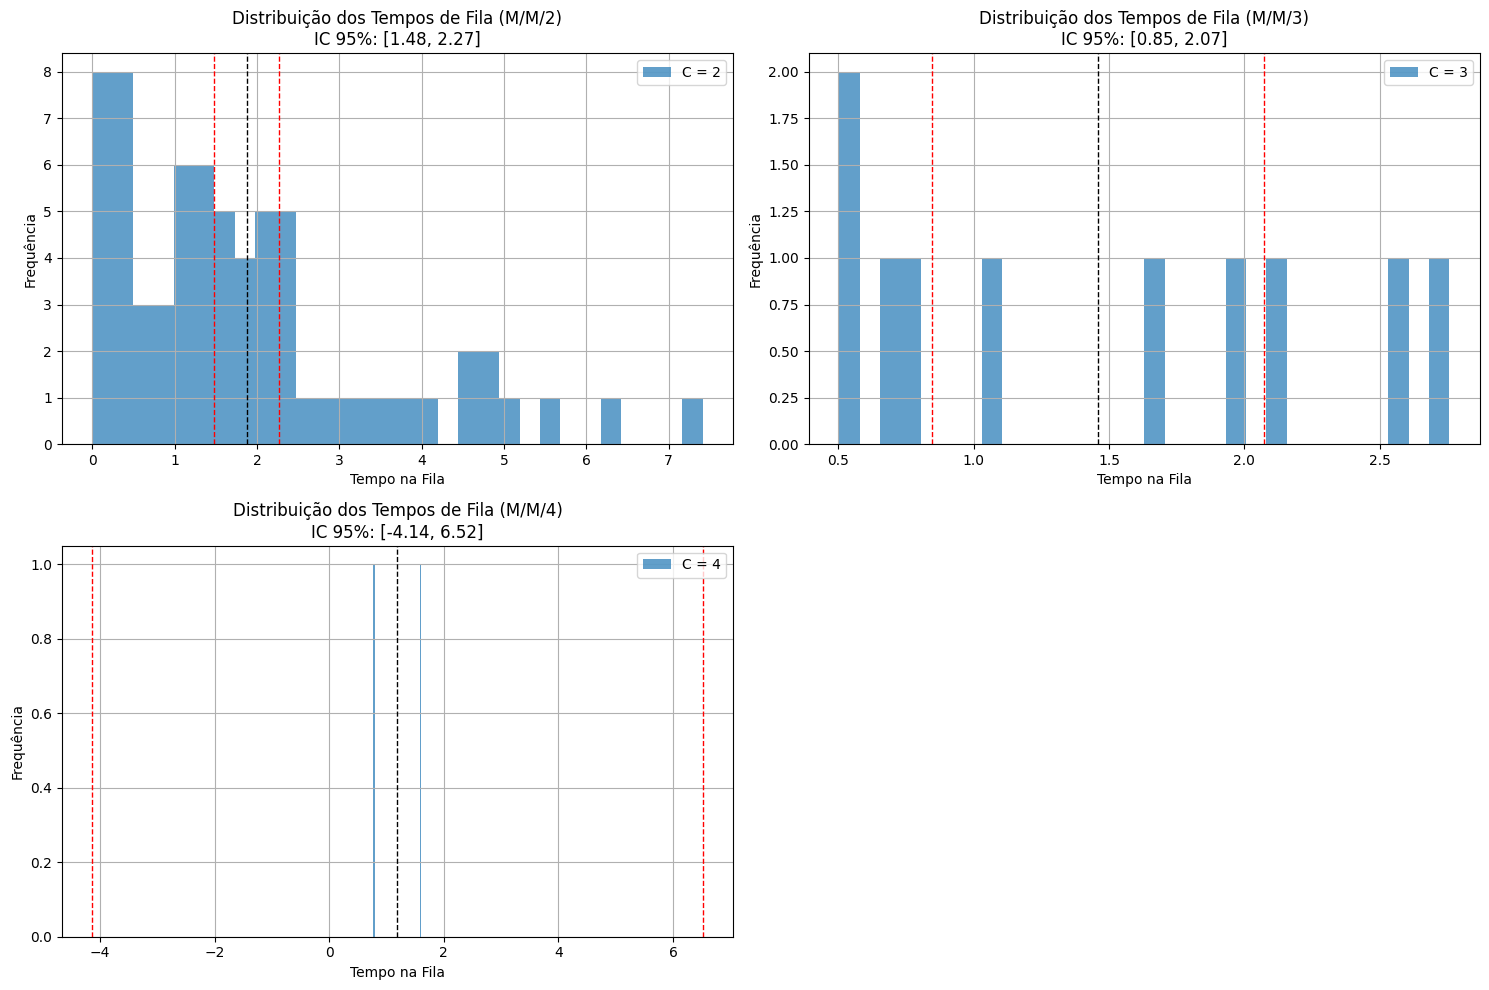

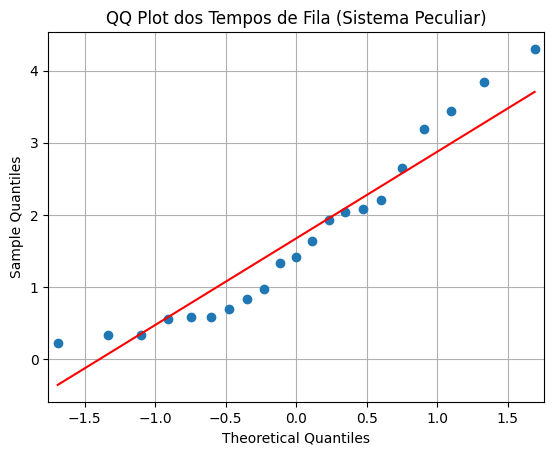

AttributeError: 'list' object has no attribute 'shape'

In [59]:
# Configurações
n_customers = 1000
lam = 0.5  # Taxa de chegada
mu = 1  # Taxa de serviço
#C_values = [2, 3, 4]  # Diferentes números de servidores
C = 2
# Simulações e gráficos
plt.figure(figsize=(15, 10))

for idx, C in enumerate(C_values):
    queue_times_mm = simulate_mm_c_queue(n_customers, lam, mu, C)
    mean_mm, lower_mm, upper_mm = confidence_interval(queue_times_mm)

    plt.subplot(2, 2, idx + 1)
    plt.hist(queue_times_mm, bins=30, alpha=0.7, label=f'C = {C}')
    plt.axvline(mean_mm, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(lower_mm, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(upper_mm, color='r', linestyle='dashed', linewidth=1)
    plt.xlabel('Tempo na Fila')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição dos Tempos de Fila (M/M/{C})\nIC 95%: [{lower_mm:.2f}, {upper_mm:.2f}]')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# QQ plot para os tempos de fila do sistema peculiar
sm.qqplot(np.array(queue_times), line='s')
plt.title('QQ Plot dos Tempos de Fila (Sistema Peculiar)')
plt.grid(True)
plt.show()

# QQ plot para os tempos de fila do sistema M/M/C para  C -> 2
#if queue_times_mm and len(queue_times_mm) > 20: # Adjust the minimum length as needed
sm.qqplot(queue_times_mm, line='s')
plt.title('QQ-plot for Queue Times (M/M/2)')
plt.grid(True)
plt.show()


In [53]:
# prompt: como eu consigo plotar o grafico qq plot do exercicio acima para C = 2

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ... (seu código existente) ...

# Configurações e Execução da Simulação para M/M/2
n_customers = 1000
lam = 0.5  # Taxa de chegada
mu = 1  # Taxa de serviço
C = 2  # Número de servidores

queue_times_mm = simulate_mm_c_queue(n_customers, lam, mu, C)

# Criar o QQ-plot
sm.qqplot(queue_times_mm, line='s')
plt.title('QQ-plot para os Tempos de Fila (M/M/2)')
plt.show()

AttributeError: 'list' object has no attribute 'shape'

Testes e validação dos resultados com QQ-plot.

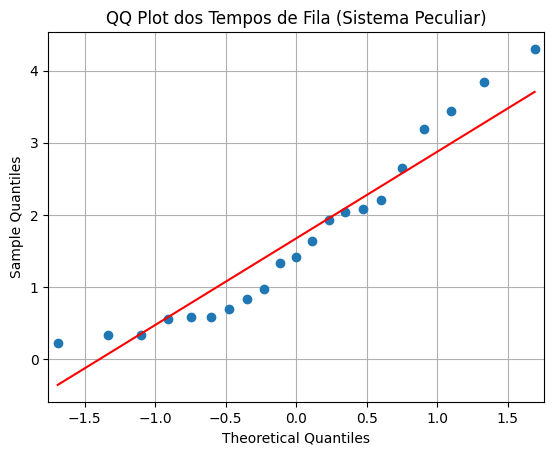

AttributeError: 'list' object has no attribute 'shape'

In [57]:
import statsmodels.api as sm

# QQ plot para os tempos de fila do sistema peculiar
sm.qqplot(np.array(queue_times), line='s')
plt.title('QQ Plot dos Tempos de Fila (Sistema Peculiar)')
plt.grid(True)
plt.show()

# QQ plot para os tempos de fila do sistema M/M/C para  C -> 2
#if queue_times_mm and len(queue_times_mm) > 20: # Adjust the minimum length as needed
sm.qqplot(queue_times_mm, line='45')
plt.title('QQ-plot for Queue Times (M/M/2)')
plt.grid(True)
plt.show()
#else:
#   print("Not enough data points in queue_times_mm to generate a meaningful QQ-plot")


In [ ]:
# prompt: porque o grafico do qq plot queue_times_mm nao apareceu?

   if queue_times_mm and len(queue_times_mm) > 20: # Adjust the minimum length as needed
       sm.qqplot(queue_times_mm, line='45')
       plt.title('QQ-plot for Queue Times (M/M/2)')
       plt.show()
   else:
       print("Not enough data points in queue_times_mm to generate a meaningful QQ-plot")
   ```


Here's an example code snippet with suggested modifications:

